# Bucur Robert - Adrian
## Grupa 10LF381
### cap8 - statinf8.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.sandbox.regression.predstd import wls_prediction_std

plt.rcParams.update({'font.size': 14})

# Proprietati ale regresiei multi-variabila

In [2]:
# see https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-4-9b0119887130
# and https://seaborn.pydata.org/tutorial/regression.html, and
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
# https://medium.com/@sebastiannorena/finding-correlation-between-many-variables-multidimensional-dataset-with-python-5deb3f39ffb3
swiss = pd.read_csv('swiss.csv')
swiss.columns = ['District', 'Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic', 
                 'InfantMortality']
swiss.head()

,District,Fertility,Agriculture,Examination,Education,Catholic,InfantMortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6


In [3]:
swiss.corr()

,Fertility,Agriculture,Examination,Education,Catholic,InfantMortality
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496
InfantMortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000


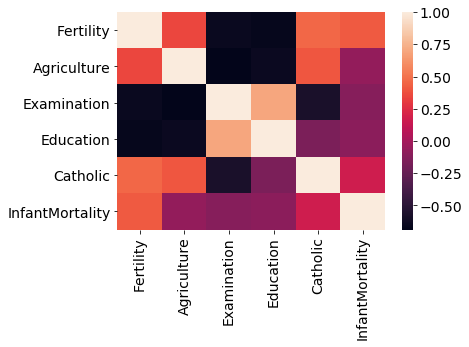

In [4]:
sns.heatmap(swiss.corr())
plt.show()

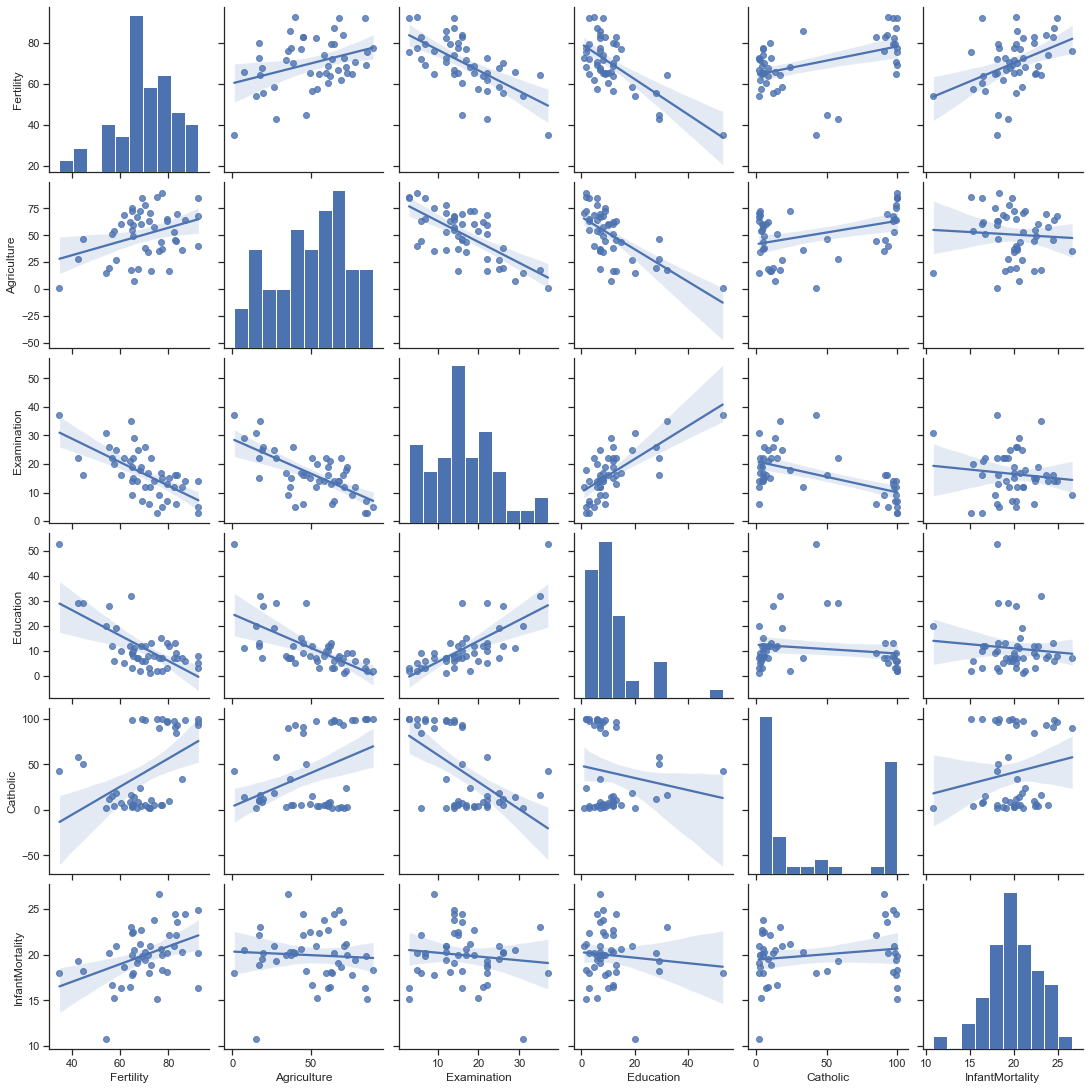

In [5]:
sns.set(style="ticks")
sns.pairplot(swiss, kind='reg')
plt.show()

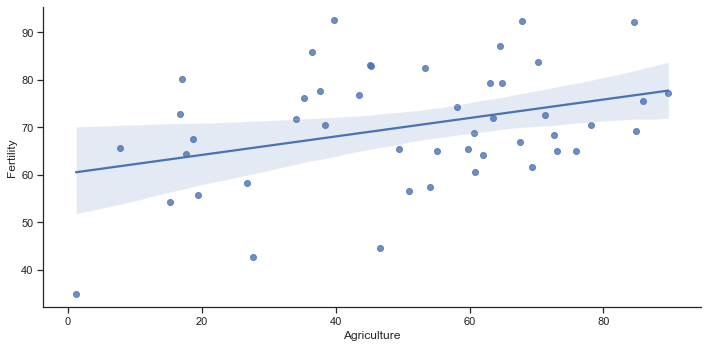

0.35307918361997476


In [6]:
sns.lmplot(x='Agriculture', y='Fertility', data=swiss, aspect=2)
plt.show()
print(swiss.corr()['Agriculture']['Fertility'])

In [7]:
# https://stackoverflow.com/questions/19991445/run-an-ols-regression-with-pandas-data-frame
lm = smf.ols(formula='Fertility ~ Agriculture + Examination + Education + Catholic + InfantMortality', 
             data=swiss).fit()
print(lm.params)
lm.summary()

Intercept          66.915182
Agriculture        -0.172114
Examination        -0.258008
Education          -0.870940
Catholic            0.104115
InfantMortality     1.077048
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     19.76
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           5.59e-10
Time:                        09:42:01   Log-Likelihood:                -156.04
No. Observations:                  47   AIC:                             324.1
Df Residuals:                      41   BIC:                             335.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          66.9152     10.706      6.250      0.000      45.294      88.536
Agriculture        -0.1721      0.070     -2.448      0.019      -0.314      -0.030
Examination        -0.2580      0.254     -1.016      0.315      -0.771       0.255
Education          -0.8709      0.183     -4.758      0.000      -1.241      -0.501
Catholic            0.1041      0.035      2.953      0.005       0.033       0.175
InfantMortality     1.0770      0.382      2.822      0.007       0.306       1.848
==============================================================================
Omnibus:                        0.058   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.155
Skew:                          -0.077   Prob(JB):                        0.925
Kurtosis:                       2.764   Cond. No.                         807.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
lm = smf.ols(formula='Fertility ~ Agriculture', data=swiss).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     6.409
Date:                Thu, 18 Jun 2020   Prob (F-statistic):             0.0149
Time:                        09:42:02   Log-Likelihood:                -181.73
No. Observations:                  47   AIC:                             367.5
Df Residuals:                      45   BIC:                             371.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      60.3044      4.251     14.185      0.000      51.742      68.867
Agriculture     0.1942      0.077      2.532      0.015       0.040       0.349
==============================================================================
Omnibus:                        0.295   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.863   Jarque-Bera (JB):                0.481
Skew:                          -0.095   Prob(JB):                        0.786
Kurtosis:                       2.542   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
n = 100 ; x2 = np.array(range(1, n+1))
x1 = .01 * x2 + np.random.uniform(-.1, .1, size=n)
y = -x1 + x2 + np.random.randn(n)*.01

df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
lm1 = smf.ols(formula='y ~ x1', data=df).fit()
lm2 = smf.ols(formula='y ~ x1 + x2', data=df).fit()
print(lm1.summary())
print(lm2.summary())

OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     3000.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           2.64e-75
Time:                        09:42:02   Log-Likelihood:                -304.45
No. Observations:                 100   AIC:                             612.9
Df Residuals:                      98   BIC:                             618.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0809      0.999      3.085      0.003       1.099       5.063
x

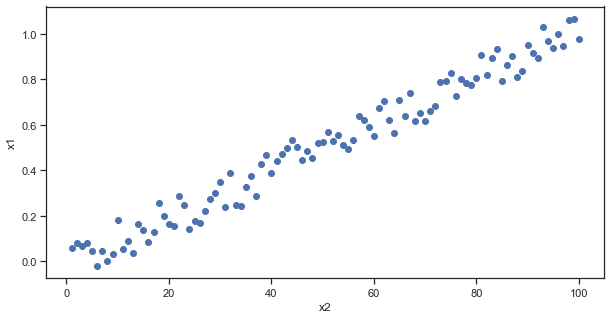

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x2, x1, 'o')
ax.set_xlabel('x2')
ax.set_ylabel('x1')
plt.show()

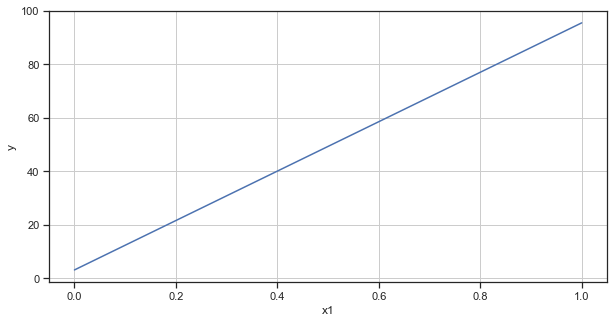

In [11]:
newdf = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2,
    'ey': smf.ols(formula='y ~ x2', data=df).fit().resid,
    'ex1': smf.ols(formula='x1 ~ x2', data=df).fit().resid})
params = smf.ols(formula='y ~ x1', data=df).fit().params
x = np.linspace(0, 1, 10)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
cm = plt.cm.get_cmap('winter')
# sc = ax.scatter(x=x1, y=y, c=x2, cmap=cm, data=newdf)
ax.plot(x, params[0] + x * params[1])
ax.set_xlabel('x1') ; ax.set_ylabel('y')
# fig.colorbar(sc, ax=ax).set_label('x2')
ax.grid() ; plt.show()

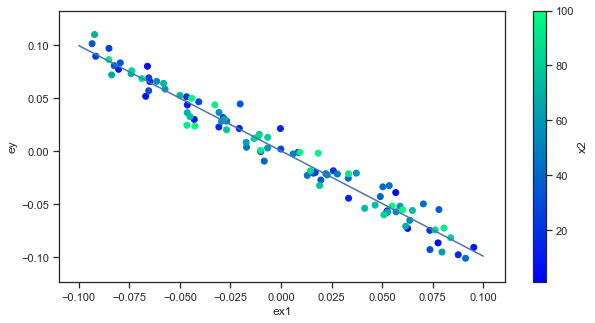

In [12]:
params = smf.ols(formula='ey ~ ex1', data=newdf).fit().params
x = np.linspace(-0.1, 0.1, 10)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
cm = plt.cm.get_cmap('winter')
sc = ax.scatter(x=newdf.ex1.values, y=newdf.ey.values, c=newdf.x2.values, cmap=cm)
ax.plot(x, params[0] + x * params[1])
ax.set_xlabel('ex1') ; ax.set_ylabel('ey')
fig.colorbar(sc, ax=ax).set_label('x2')
plt.show()

In [13]:
print(np.corrcoef(swiss.Agriculture, swiss.Education)[0][1])
print(np.corrcoef(swiss.Education, swiss.Examination)[0][1])
print(np.corrcoef(swiss.Agriculture, swiss.Fertility)[0][1])

-0.63952251894832
0.6984152962884828
0.35307918361997487


In [14]:
swiss2 = swiss.copy()
swiss2['z'] = swiss2['Agriculture'] + swiss2['Education']

lm = smf.ols(formula='Fertility ~ Agriculture + Examination + Education + Catholic + InfantMortality + z', 
             data=swiss2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     19.76
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           5.59e-10
Time:                        09:42:07   Log-Likelihood:                -156.04
No. Observations:                  47   AIC:                             324.1
Df Residuals:                      41   BIC:                             335.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          66.9152     10.706      6.250      0.000      45.294      88.536
Agriculture         0.1756      0.062      2.852      0.007       0.051       0.300
Examination        -0.2580      0.254     -1.016      0.315      -0.771       0.255
Education          -0.5233      0.115     -4.536      0.000      -0.756      -0.290
Catholic            0.1041      0.035      2.953      0.005       0.033       0.175
InfantMortality     1.0770      0.382      2.822      0.007       0.306       1.848
z                  -0.3477      0.073     -4.760      0.000      -0.495      -0.200
==============================================================================
Omnibus:                        0.058   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.155
Skew:                          -0.077   Prob(JB):                        0.925
Kurtosis:                       2.764   Cond. No.                     2.85e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.8e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
insectsprays = pd.read_csv('insect_sprays.csv')
insectsprays.head()

,Unnamed: 0,count,spray
0,1,10,A
1,2,7,A
2,3,20,A
3,4,14,A
4,5,14,A


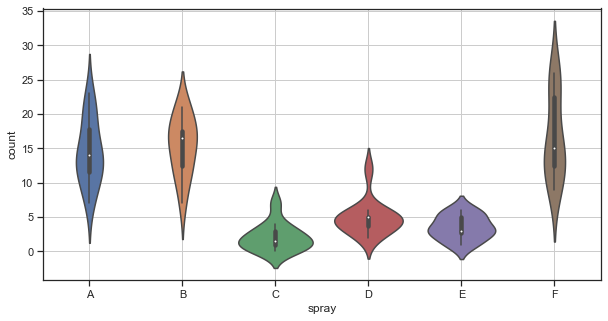

In [16]:
# see https://seaborn.pydata.org/generated/seaborn.violinplot.html
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.violinplot(x='spray', y='count', data=insectsprays, ax=ax)
ax.grid()
plt.show()

In [17]:
lm = smf.ols(formula='count ~ spray', data=insectsprays).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     34.70
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           3.18e-17
Time:                        09:42:08   Log-Likelihood:                -197.42
No. Observations:                  72   AIC:                             406.8
Df Residuals:                      66   BIC:                             420.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.5000      1.132     12.807      0.000      12.240      16.760
spray[T.B]     0.8333      1.601      0.520      0.604      -2.363       4.030
spray[T.C]   -12.4167      1.601     -7.755      0.000     -15.613      -9.220
spray[T.D]    -9.5833      1.601     -5.985      0.000     -12.780      -6.387
spray[T.E]   -11.0000      1.601     -6.870      0.000     -14.197      -7.803
spray[T.F]     2.1667      1.601      1.353      0.181      -1.030       5.363
==============================================================================
Omnibus:                        3.201   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.421
Skew:                           0.411   Prob(JB):                        0.298
Kurtosis:                       3.360   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
insectsprays.head()

,Unnamed: 0,count,spray
0,1,10,A
1,2,7,A
2,3,20,A
3,4,14,A
4,5,14,A


In [19]:
is2 = insectsprays.copy()
for x in ['A', 'B', 'C', 'D', 'E', 'F']:
    is2[x] = 1*(is2.spray == x) # is2[x] = is2[x].astype(float)
print(is2.head())

lm = smf.ols(formula='count ~ B + C + D + E + F', data=is2).fit()
print(lm.summary())

# vezi condition number cand introducem A (redundant)

Unnamed: 0  count spray  A  B  C  D  E  F
0           1     10     A  1  0  0  0  0  0
1           2      7     A  1  0  0  0  0  0
2           3     20     A  1  0  0  0  0  0
3           4     14     A  1  0  0  0  0  0
4           5     14     A  1  0  0  0  0  0
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     34.70
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           3.18e-17
Time:                        09:42:09   Log-Likelihood:                -197.42
No. Observations:                  72   AIC:                             406.8
Df Residuals:                      66   BIC:                             420.5
Df Model:                           5                                         
Covariance Type:      

In [20]:
lm = smf.ols(formula='count ~ A + B + D + E + F', data=is2).fit()
print(lm.summary())


OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     34.70
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           3.18e-17
Time:                        09:42:09   Log-Likelihood:                -197.42
No. Observations:                  72   AIC:                             406.8
Df Residuals:                      66   BIC:                             420.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0833      1.132      1.840      0.070      -0.177       4.344
A

In [21]:
lm = smf.ols(formula='count ~ spray - 1', data=insectsprays).fit()
lm.summary()

# vezi mai multe la http://www.statsmodels.org/dev/example_formulas.html

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     34.70
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           3.18e-17
Time:                        09:42:09   Log-Likelihood:                -197.42
No. Observations:                  72   AIC:                             406.8
Df Residuals:                      66   BIC:                             420.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
spray[A]      14.5000      1.132     12.807      0.000      12.240      16.760
spray[B]      15.3333      1.132     13.543      0.000      13.073      17.594
spray[C]       2.0833      1.132      1.840      0.070      -0.177       4.344
spray[D]       4.9167      1.132      4.343      0.000       2.656       7.177
spray[E]       3.5000      1.132      3.091      0.003       1.240       5.760
spray[F]      16.6667      1.132     14.721      0.000      14.406      18.927
==============================================================================
Omnibus:                        3.201   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.421
Skew:                           0.411   Prob(JB):                        0.298
Kurtosis:                       3.360   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regresia cu variabile continue și categoriale

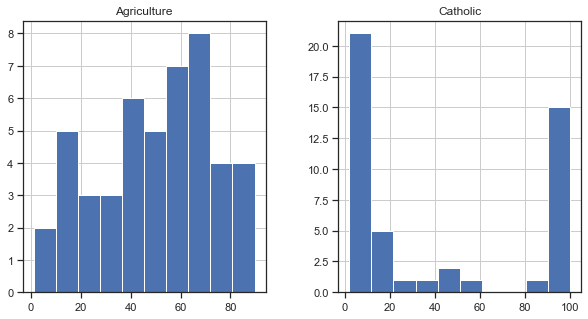

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
swiss.hist(column=['Agriculture', 'Catholic'], bins=10, ax=ax)
plt.show()

In [23]:
swiss3 = swiss.copy()
swiss3['CatholicBin'] = 1 * (swiss.Catholic > 50)
swiss3.head()

,District,Fertility,Agriculture,Examination,Education,Catholic,InfantMortality,CatholicBin
0,Courtelary,80.2,17.0,15,12,9.96,22.2,0
1,Delemont,83.1,45.1,6,9,84.84,22.2,1
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2,1
3,Moutier,85.8,36.5,12,7,33.77,20.3,0
4,Neuveville,76.9,43.5,17,15,5.16,20.6,0


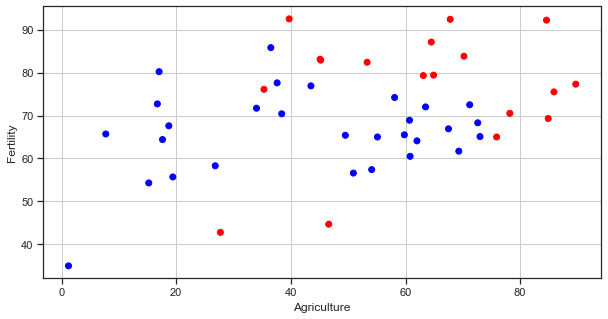

In [24]:
swiss3 = swiss.copy() ; swiss3['CatholicBin'] = 1 * (swiss.Catholic > 50)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.scatter(swiss3.Agriculture, swiss3.Fertility, 
            c=['Red' if x else 'Blue' for x in swiss3.CatholicBin.values])
ax.set_xlabel('Agriculture') ; ax.set_ylabel('Fertility')
plt.grid() ; plt.show()

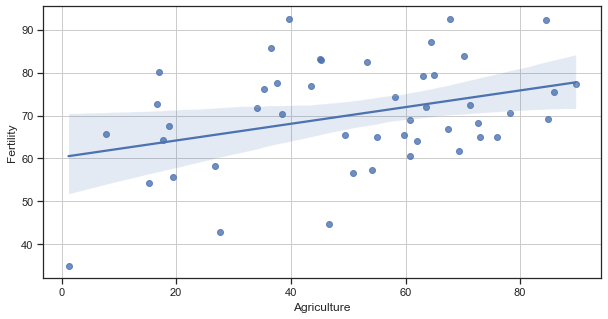

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.regplot(y='Fertility', x='Agriculture', data=swiss3, ax=ax)
plt.grid() ; plt.show()

In [26]:
lm = smf.ols(formula='Fertility ~ Agriculture', data=swiss3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     6.409
Date:                Thu, 18 Jun 2020   Prob (F-statistic):             0.0149
Time:                        09:42:14   Log-Likelihood:                -181.73
No. Observations:                  47   AIC:                             367.5
Df Residuals:                      45   BIC:                             371.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      60.3044      4.251     14.185      0.000      51.742      68.867
Agriculture     0.1942      0.077      2.532      0.015       0.040       0.349
==============================================================================
Omnibus:                        0.295   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.863   Jarque-Bera (JB):                0.481
Skew:                          -0.095   Prob(JB):                        0.786
Kurtosis:                       2.542   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
lm = smf.ols(formula='Fertility ~ Agriculture + C(CatholicBin)', data=swiss3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     5.660
Date:                Thu, 18 Jun 2020   Prob (F-statistic):            0.00649
Time:                        09:42:15   Log-Likelihood:                -179.48
No. Observations:                  47   AIC:                             365.0
Df Residuals:                      44   BIC:                             370.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              60.8322      4.106     14.816      0.000      52.557      69.107
C(CatholicBin)[T.1]     7.8843      3.748      2.103      0.041       0.330      15.439
Agriculture             0.1242      0.081      1.531      0.133      -0.039       0.288
==============================================================================
Omnibus:                        6.176   Durbin-Watson:                   0.703
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.983
Skew:                          -0.696   Prob(JB):                       0.0828
Kurtosis:                       3.778   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

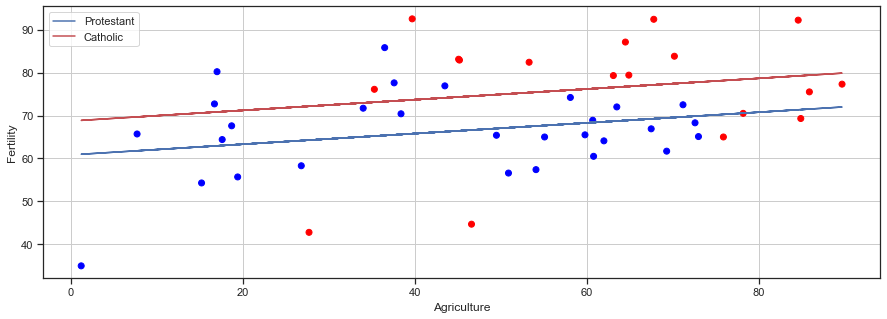

In [28]:
params = smf.ols(formula='Fertility ~ Agriculture + C(CatholicBin)', data=swiss3).fit().params
x = swiss3.Agriculture.values ; fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.scatter(swiss3.Agriculture, swiss3.Fertility, c=['Red' if x else 'Blue' for x in swiss3.CatholicBin.values])
ax.plot(x, params[0] + params[2] * x, 'b')
ax.plot(x, params[0] + params[1] + params[2] * x, 'r')
ax.set_xlabel('Agriculture') ; ax.set_ylabel('Fertility')
ax.legend(['Protestant', 'Catholic']) ; plt.grid() ; plt.show()

In [29]:
lm = smf.ols(formula='Fertility ~ Agriculture * C(CatholicBin)', data=swiss3).fit()
print(lm.summary())

OLS Regression Results                            
Dep. Variable:              Fertility   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     3.795
Date:                Thu, 18 Jun 2020   Prob (F-statistic):             0.0168
Time:                        09:42:15   Log-Likelihood:                -179.34
No. Observations:                  47   AIC:                             366.7
Df Residuals:                      43   BIC:                             374.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          62.

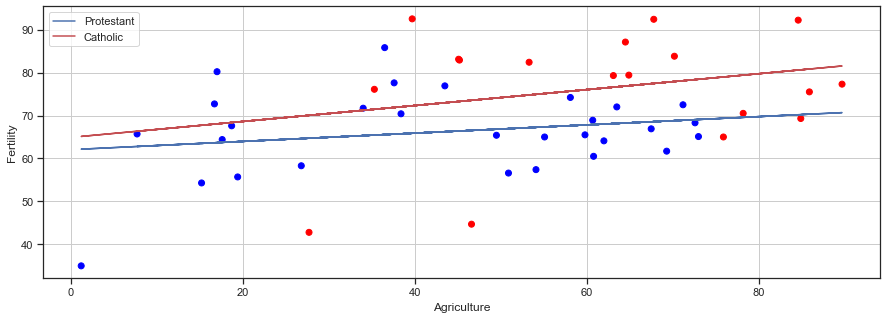

In [30]:
x = swiss3.Agriculture.values ; fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.scatter(swiss3.Agriculture, swiss3.Fertility, c=['Red' if x else 'Blue' for x in swiss3.CatholicBin.values])
ax.plot(x, lm.params[0] + lm.params[2] * x, 'b')
ax.plot(x, lm.params[0] + lm.params[1] + (lm.params[2] + lm.params[3]) * x, 'r')
ax.set_xlabel('Agriculture') ; ax.set_ylabel('Fertility')
ax.legend(['Protestant', 'Catholic']) ; plt.grid() ; plt.show()

In [31]:
# vezi https://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/en_Tanagra_Python_StatsModels.pdf

# Laborator

__Q1__. Pentru swiss dataset, realizați modelul de regresie liniară pentru Fertility în funcție de Agriculture și Education. Remarcați intercept și cei doi coeficienți.

Mai departe arătați cum coeficientul regresorului $x_1$ (Agriculture) este de fapt coeficientul regresiei caracteristice răspunsului $y$ (Fertility) și regresorului $x_2$ (Education) din care contribuția celuilalt regresor ($x_1$) a fost deja înlăturată.

__Hint1__: contribuția unui regresor nu mai este prezentă în reziduul asociat, și se înlătură folosind regresia liniară (revedeți slide-urile 42-end din cursul 7).

__Hint2__: folosiți proprietatea .resid a modelului deja potrivit.

In [32]:
swiss = pd.read_csv('swiss.csv')
swiss.columns = ['District', 'Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic', 
                 'InfantMortality']
swiss.head()

,District,Fertility,Agriculture,Examination,Education,Catholic,InfantMortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6


In [33]:
lm1 = smf.ols(formula='Fertility ~ Agriculture', data = swiss).fit()
lm2 = smf.ols(formula='Fertility ~ Education', data = swiss).fit()

swiss['residAgriculture'] = lm1.resid
swiss['residEducation'] = lm2.resid

lm3 = smf.ols(formula='residAgriculture ~ residEducation - 1', data = swiss).fit()
lm4 = smf.ols(formula='Fertility ~ Agriculture + Education', data = swiss).fit()

In [34]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     6.409
Date:                Thu, 18 Jun 2020   Prob (F-statistic):             0.0149
Time:                        09:42:17   Log-Likelihood:                -181.73
No. Observations:                  47   AIC:                             367.5
Df Residuals:                      45   BIC:                             371.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      60.3044      4.251     14.185      0.000      51.742      68.867
Agriculture     0.1942      0.077      2.532      0.015       0.040       0.349
==============================================================================
Omnibus:                        0.295   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.863   Jarque-Bera (JB):                0.481
Skew:                          -0.095   Prob(JB):                        0.786
Kurtosis:                       2.542   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     35.45
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           3.66e-07
Time:                        09:42:17   Log-Likelihood:                -171.21
No. Observations:                  47   AIC:                             346.4
Df Residuals:                      45   BIC:                             350.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.6101      2.104     37.836      0.000      75.372      83.848
Education     -0.8624      0.145     -5.954      0.000      -1.154      -0.571
==============================================================================
Omnibus:                        4.586   Durbin-Watson:                   0.691
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                2.612
Skew:                           0.351   Prob(JB):                        0.271
Kurtosis:                       2.083   Cond. No.                         22.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       residAgriculture   R-squared (uncentered):                   0.698
Model:                            OLS   Adj. R-squared (uncentered):              0.691
Method:                 Least Squares   F-statistic:                              106.3
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                    1.53e-13
Time:                        09:42:17   Log-Likelihood:                         -153.60
No. Observations:                  47   AIC:                                      309.2
Df Residuals:                      46   BIC:                                      311.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
residEducation     1.0451      0.101     10.310      0.000       0.841       1.249
==============================================================================
Omnibus:                       31.544   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.226
Skew:                          -1.833   Prob(JB):                     2.80e-17
Kurtosis:                       8.049   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     17.95
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           2.00e-06
Time:                        09:42:17   Log-Likelihood:                -170.85
No. Observations:                  47   AIC:                             347.7
Df Residuals:                      44   BIC:                             353.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      84.0801      5.782     14.542      0.000      72.428      95.733
Agriculture    -0.0665      0.080     -0.830      0.411      -0.228       0.095
Education      -0.9628      0.189     -5.092      0.000      -1.344      -0.582
==============================================================================
Omnibus:                        3.384   Durbin-Watson:                   0.775
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                2.366
Skew:                           0.374   Prob(JB):                        0.306
Kurtosis:                       2.195   Cond. No.                         234.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q2__. Pentru setul mtcars, considerați variabila categorială 'număr de cilindri'.

a) Ridicați diagrama pair plot.

In [38]:
mtcars = pd.read_csv('mtcars.csv')
cyl = mtcars.loc[:, 'cyl']
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


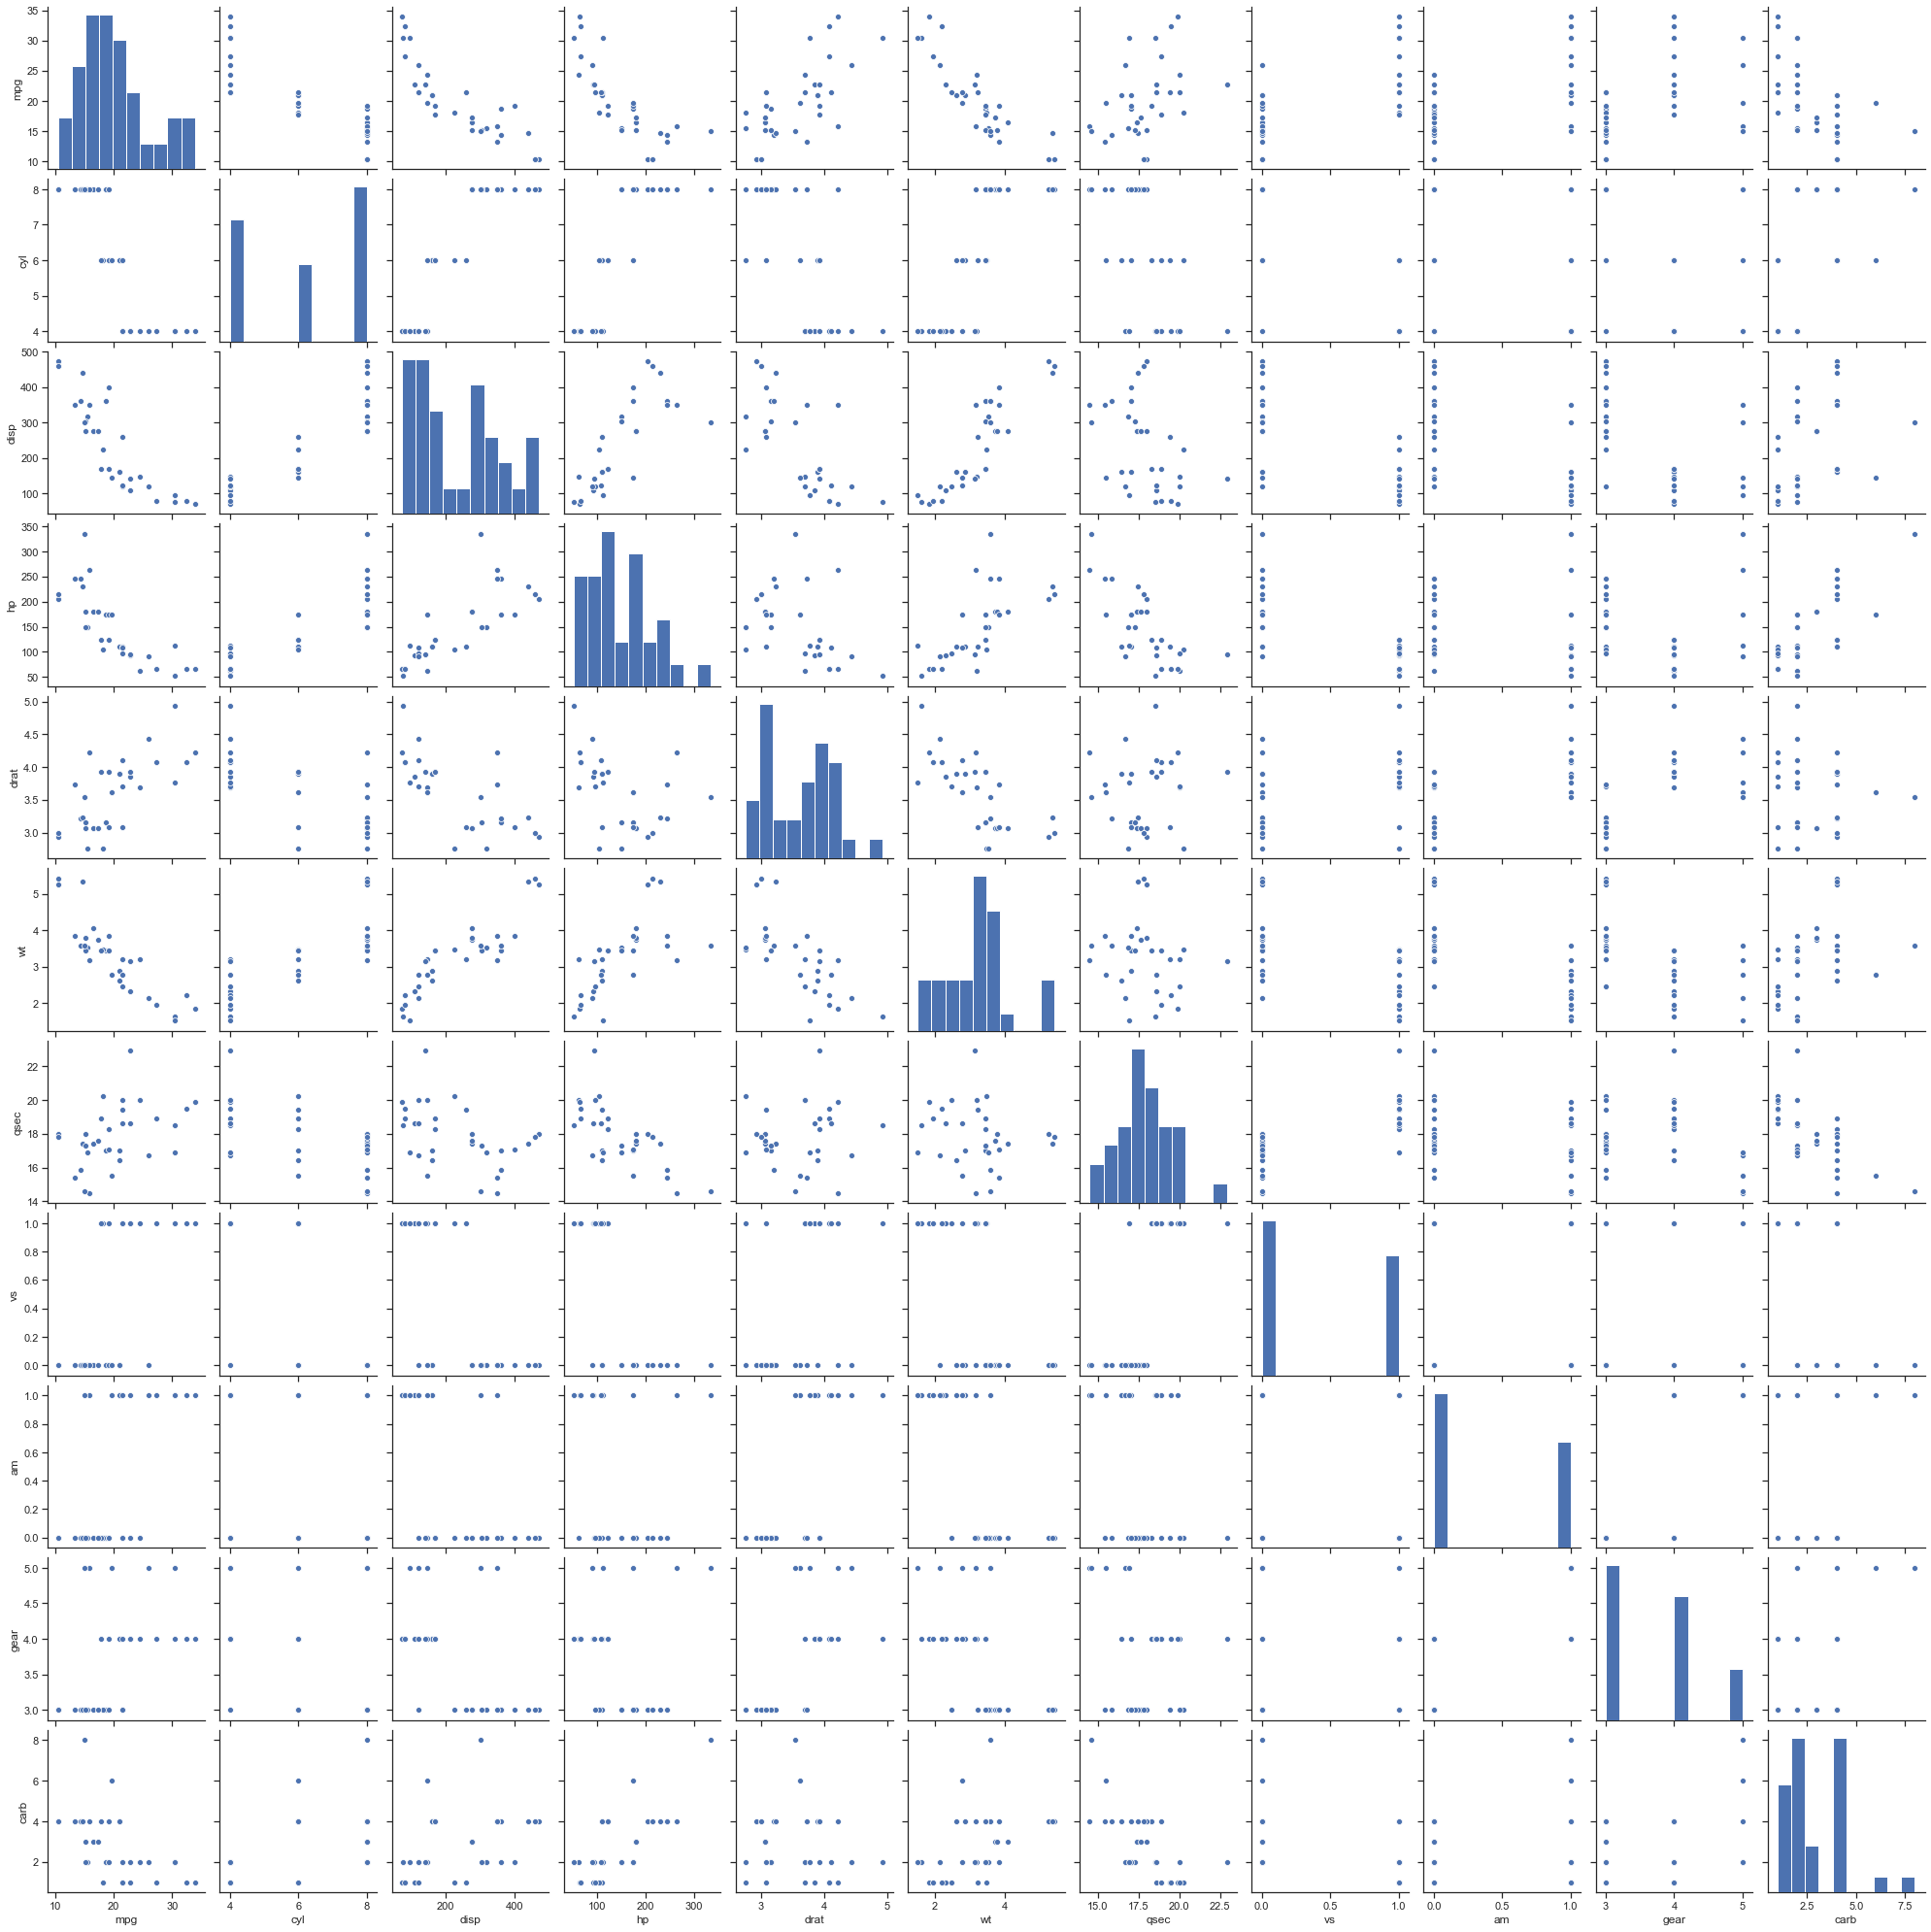

In [39]:
sns.pairplot(mtcars)

b) Calculați coeficienții de regresie. Există variabile care par să explice consumul?

In [40]:
lm = smf.ols(formula='cyl ~ mpg + disp + hp + drat + wt + qsec + vs + am + gear + carb', data = mtcars).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cyl   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     30.20
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           3.16e-10
Time:                        09:43:56   Log-Likelihood:                -19.725
No. Observations:                  32   AIC:                             61.45
Df Residuals:                      21   BIC:                             77.57
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1072      2.933      4.128      0.000       6.008      18.207
mpg           -0.0049      0.046     -0.107      0.916      -0.100       0.090
disp           0.0046      0.004      1.266      0.219      -0.003       0.012
hp             0.0037      0.005      0.813      0.425      -0.006       0.013
drat          -0.4274      0.330     -1.294      0.210      -1.114       0.260
wt            -0.2225      0.427     -0.521      0.608      -1.111       0.666
qsec          -0.1879      0.152     -1.239      0.229      -0.503       0.127
vs            -0.6441      0.417     -1.546      0.137      -1.510       0.222
am            -0.5008      0.431     -1.162      0.258      -1.397       0.395
gear          -0.5003      0.294     -1.705      0.103      -1.111       0.110
carb           0.1799      0.169      1.066      0.299      -0.171       0.531
==============================================================================
Omnibus:                        0.519   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.642
Skew:                          -0.230   Prob(JB):                        0.725
Kurtosis:                       2.481   Cond. No.                     9.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
lm = smf.ols(formula='mpg ~ cyl + disp + hp + drat + wt + qsec + vs + am + gear + carb', data = mtcars).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           3.79e-07
Time:                        09:43:57   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3034     18.718      0.657      0.518     -26.623      51.229
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
am             2.5202      2.057      1.225      0.234      -1.757       6.797
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

c) Ridicați pe un scatter plot regresia mpg funcție de horsepower.

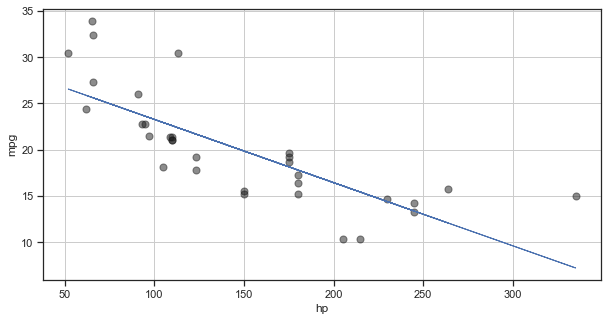

In [42]:
x = mtcars['hp'].values
y = mtcars['mpg'].values
beta1 = np.corrcoef(x, y)[0, 1] * np.std(y) / np.std(x)
beta0 = np.mean(y) - beta1 * np.mean(x)
y_hat = beta1 * x + beta0

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x, y_hat, lw=1)
ax.set(xlabel="hp", ylabel="mpg")
ax.grid(True)
plt.show()

d) În funcție și de numărul de cilindri, realizați două linii de regresie dacă presupunem că nu există interacțiune între horsepower și numărul de cilindri.

In [43]:
lm = smf.ols(formula='mpg ~ cyl + hp', data = mtcars).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     41.42
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           3.16e-09
Time:                        09:43:59   Log-Likelihood:                -80.781
No. Observations:                  32   AIC:                             167.6
Df Residuals:                      29   BIC:                             172.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.9083      2.191     16.847      0.000      32.428      41.389
cyl           -2.2647      0.576     -3.933      0.000      -3.443      -1.087
hp            -0.0191      0.015     -1.275      0.213      -0.050       0.012
==============================================================================
Omnibus:                        1.178   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                1.092
Skew:                           0.411   Prob(JB):                        0.579
Kurtosis:                       2.623   Cond. No.                         645.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

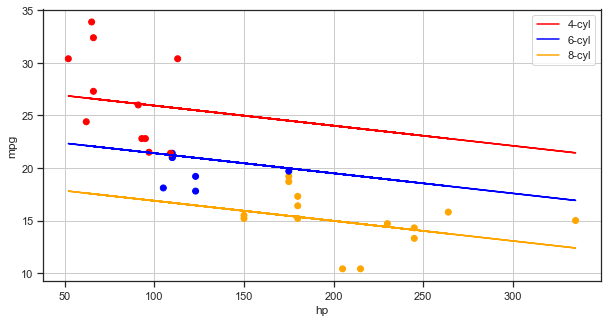

In [44]:
x = mtcars['hp'].values
params = smf.ols(formula='mpg ~ hp + cyl', data=mtcars).fit().params

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
c = mtcars['cyl'].copy()
c[mtcars['cyl'] == 4] = 'Red'
c[mtcars['cyl'] == 6] = 'Blue'
c[mtcars['cyl'] == 8] = 'Orange'
ax.scatter(mtcars.hp, mtcars.mpg, c=c)
ax.plot(x, params[0] + params[1] * x + params[2] * 4, 'red')
ax.plot(x, params[0] + params[1] * x + params[2] * 6, 'blue')
ax.plot(x, params[0] + params[1] * x + params[2] * 8, 'orange')
ax.set_xlabel('hp')
ax.set_ylabel('mpg')
ax.legend(['4-cyl', '6-cyl', '8-cyl'])
plt.grid()
plt.show()

e) În funcție și de numărul de cilindri, realizați două linii de regresie dacă presupunem acum că există totuși interacțiune.

In [45]:
lm = smf.ols(formula='mpg ~ hp * C(cyl)', data=mtcars).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     19.35
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           5.02e-08
Time:                        09:44:00   Log-Likelihood:                -77.542
No. Observations:                  32   AIC:                             167.1
Df Residuals:                      26   BIC:                             175.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         35.9830      3.889      9.252      0.000      27.989      43.977
C(cyl)[T.6]      -15.3092      7.435     -2.059      0.050     -30.591      -0.027
C(cyl)[T.8]      -17.9030      5.260     -3.404      0.002     -28.714      -7.092
hp                -0.1128      0.046     -2.465      0.021      -0.207      -0.019
hp:C(cyl)[T.6]     0.1052      0.068      1.536      0.137      -0.036       0.246
hp:C(cyl)[T.8]     0.0985      0.049      2.026      0.053      -0.001       0.198
==============================================================================
Omnibus:                        1.589   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.452   Jarque-Bera (JB):                0.862
Skew:                           0.393   Prob(JB):                        0.650
Kurtosis:                       3.165   Cond. No.                     3.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

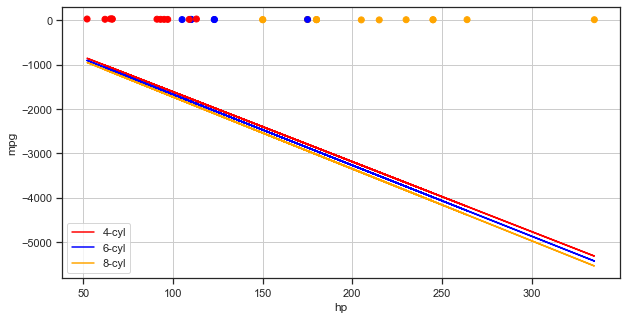

In [46]:
x = mtcars['hp'].values
params = smf.ols(formula='mpg ~ hp * C(cyl)', data=mtcars).fit().params

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
c = mtcars['cyl'].copy()
c[mtcars['cyl'] == 4] = 'Red'
c[mtcars['cyl'] == 6] = 'Blue'
c[mtcars['cyl'] == 8] = 'Orange'
ax.scatter(mtcars.hp, mtcars.mpg, c=c)
ax.plot(x, params[0] + params[1] * x + params[2] * 4 + params[3] * x * 4, 'red')
ax.plot(x, params[0] + params[1] * x + params[2] * 6 + params[3] * x * 6, 'blue')
ax.plot(x, params[0] + params[1] * x + params[2] * 8 + params[3] * x * 8, 'orange')
ax.set_xlabel('hp')
ax.set_ylabel('mpg')
ax.legend(['4-cyl', '6-cyl', '8-cyl'])
plt.grid()
plt.show()